In [9]:
import pandas as pd
from astropy.time import Time
from datetime import datetime
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
from astropy.coordinates import SkyCoord
import astropy.units as u

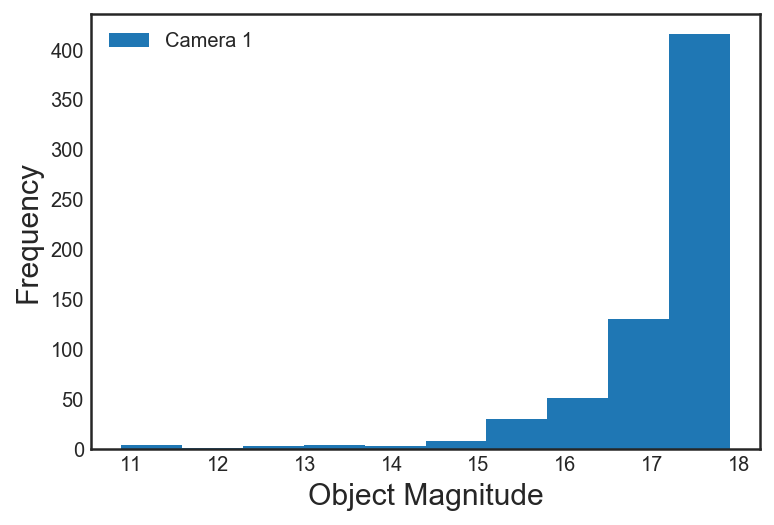

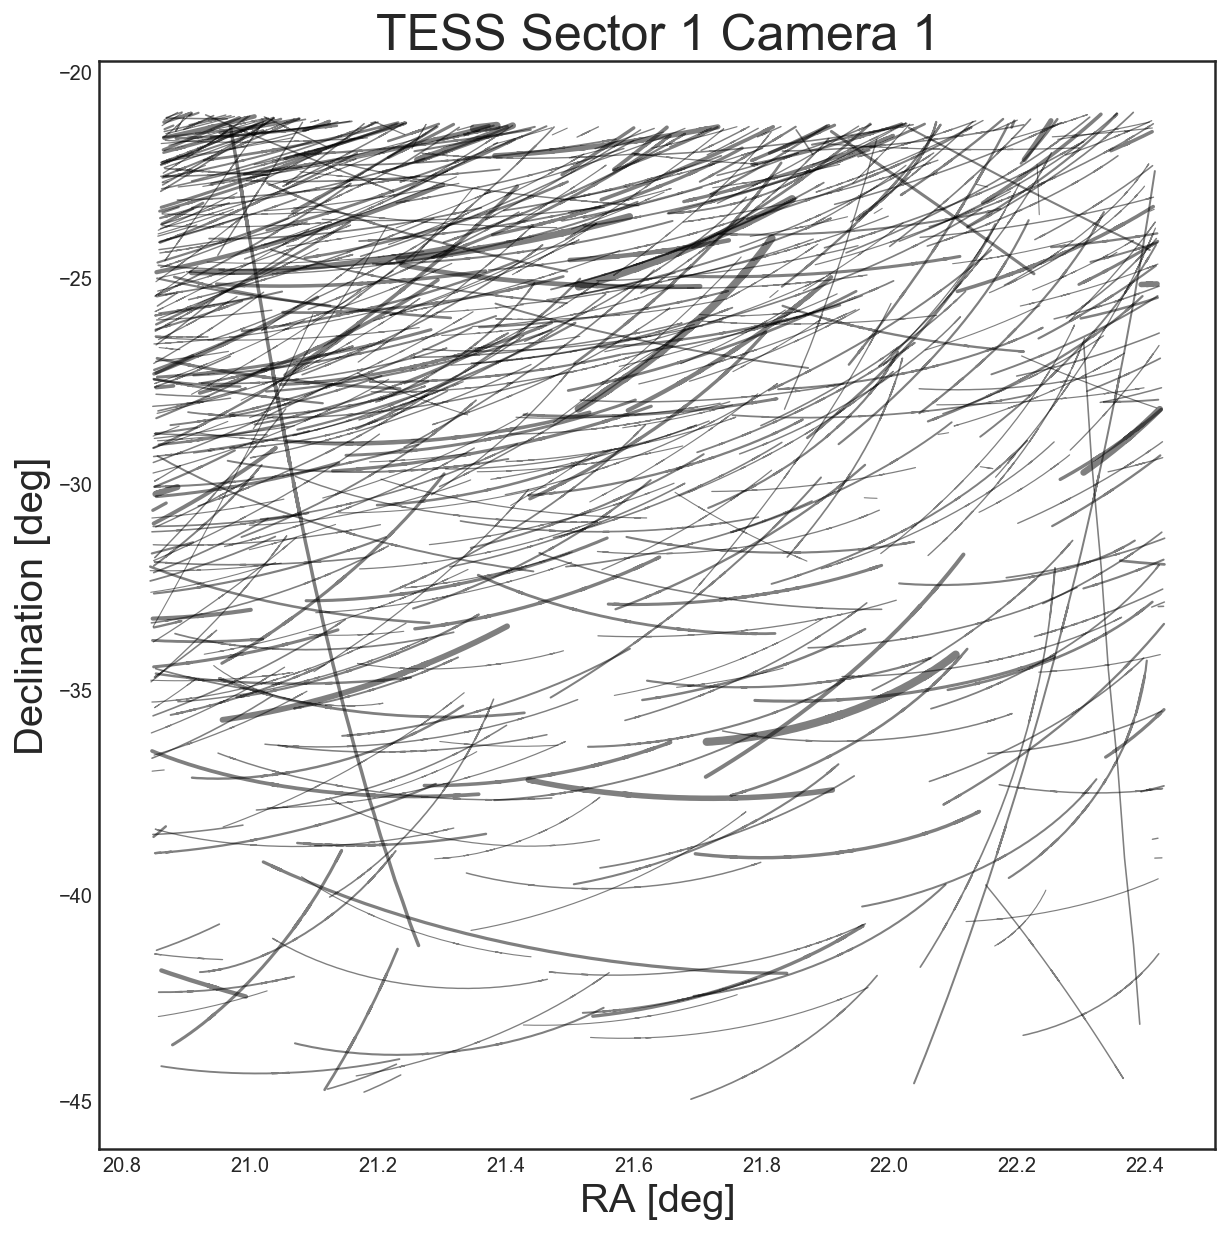

In [80]:
fig, ax = plt.subplots(1)
all_piv = None
for camera in np.arange(1, 3):
    piv = pd.read_pickle('piv_camera{}.p'.format(camera - 1))
    c = SkyCoord(piv.index.get_level_values(1), piv.index.get_level_values(2), unit=(u.deg, u.deg))
    objects = piv.index.get_level_values(0).unique()
    mags = np.asarray([piv.Mv[piv.index.get_level_values(0) == obj].mean() for obj in objects])
    length = np.asarray([(piv.index.get_level_values(0) == obj).sum()*0.5 for obj in objects])

    plt.figure(figsize=(10, 10))
    for obj, mag in zip(objects, mags):
        c1 = c[piv.index.get_level_values(0) == obj]
        plt.plot(c1.ra.value, c1.dec.value, c='k', lw= (19 - mag)/2, alpha=0.5)
    plt.xlabel('RA [deg]', fontsize=20)
    plt.ylabel('Declination [deg]', fontsize=20)
    plt.title('TESS Sector 1 Camera {}'.format(camera), fontsize=25)

    ax.hist(mags, label='Camera {}'.format(camera));
    ax.set_ylabel("Frequency", fontsize=15)
    ax.set_xlabel('Object Magnitude', fontsize=15)
    ax.legend()
    if all_piv == None:
        all_piv = piv
    else:
        all_piv = all_piv.append(piv)
    break

In [81]:
objects = all_piv.index.get_level_values(0).unique()
mags = np.asarray([all_piv.Mv[piv.index.get_level_values(0) == obj].mean() for obj in objects])
length = np.asarray([(all_piv.index.get_level_values(0) == obj).sum()*0.5 for obj in objects])

In [82]:
print('{} known solar system objects will be observerd'.format(13 * ((mags < 200)).sum()))

8437 known solar system objects will be observerd


In [83]:
print('{} Targets at 1% precision for 20 days or more'.format(13 * ((mags < 16) & (length > 20)).sum()))

481 Targets at 1% precision for 20 days or more


In [84]:
print('{} Targets at 10% percent photometry precision for 20 days or more'.format(13 * ((mags < 18) & (length > 20)).sum()))

3978 Targets at 10% percent photometry precision for 20 days or more
